### PPOCR 형식의 STD 데이터 셋을 PPOCR 형식 STR 데이터 셋으로 변환
1. 이미지에서 텍스트만 잘라서 저장
2. 레이블 파일 생성

In [48]:
from dataset import *
import project
from tools import polygon_utility
from sklearn.decomposition import PCA
import numpy as np
import warnings
import cv2

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정
def get_gradient(points):
    printcipalComponents = pca.fit(points)
    x, y = printcipalComponents.components_[0]
    return y/x 

def make_and_save_recognition_dataset(dataset, save_dir, dir_size=1000, label_file_name = "label.txt"):
    # assert not save_dir.exists(), f"please remove {save_dir}"
    label_path = save_dir/label_file_name
    image_idx = 0

    n = 0
    for i in range(len(dataset)):  
        try:
            image = dataset.get_x(i)["image"]
            labels = dataset.get_y(i)
    
            for label in labels:
                
                polygon =  label["polygon"]
                text = label["text"]
                if text in ["(한자)", "((한자))", "(((한자)))", "(일본어)", "((일본어))", "(((일본어)))", "(외국어)","((외국어))","(((외국어)))",  "(영어)", "((영어))", "(((영어)))", "xx", "xxx", "xxxx", "xxxxx", "XX", "XXX", "XXXX", "XXXXX"]:
                    continue
                for mask in ["xx", "xxx", "xxxx", "xxxxx", "XX", "XXX", "XXXX", "XXXXX"]:            
                    if mask in text:
                        continue
                
                printcipalComponents = pca.fit(polygon)
                x, y = printcipalComponents.components_[0]
                gradient = y/x
                angle = np.arctan(gradient)
                angle = np.degrees(angle)
                if angle < 0:
                    angle += 180
                
                
                
                r = 20
                if 70-r < angle and angle  < 90+r and n < 10:
                    print(polygon)
                    print(angle, label)
                    n += 1


                    cropped_image = polygon_utility.crop_by_polygon(image, polygon)
                    w, h = cropped_image.size
                    print(w, h)
                    
                    cropped_image = np.array(cropped_image)
                    cv2.line(cropped_image, (int(w/2), int(h/2)), (int(w/2+x*100), int(h/2+y*100)), (0, 0, 0), 10)
                    Image.fromarray(cropped_image).show()
                    
                # image_path = save_dir/f"{(image_idx//dir_size + 1)}"/f"{image_idx+1}.png"
                # image_path.parent.mkdir(parents=True, exist_ok=True)
                # cropped_image.save(image_path)
                # with open(label_path, "a") as f:
                #     image_name = str(image_path.relative_to(save_dir)).replace('\\', '/')
                #     f.write(f"{image_name}\t{text}\n")

                # image_idx += 1
        except Exception as e:
            print(e)
            continue

[[811, 144], [750, 144], [750, 21], [811, 21]]
90.0 {'text': '의원', 'polygon': [[811, 144], [750, 144], [750, 21], [811, 21]]}
62 124


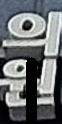

[[816, 124], [855, 124], [855, 31], [816, 31]]
90.0 {'text': '진료과목', 'polygon': [[816, 124], [855, 124], [855, 31], [816, 31]]}
40 94


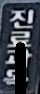

[[1676, 548], [1686, 623], [1840, 634], [1746, 821], [1762, 948], [1942, 945], [1931, 806], [1960, 715], [2015, 643], [2007, 550]]
85.59785129299549 {'text': '7', 'polygon': [[1676, 548], [1686, 623], [1840, 634], [1746, 821], [1762, 948], [1942, 945], [1931, 806], [1960, 715], [2015, 643], [2007, 550]]}
340 401


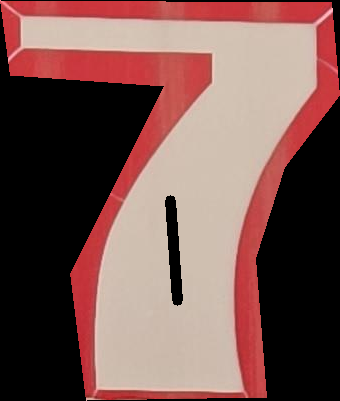

[[25, 565], [87, 641], [227, 130], [172, 72]]
105.17591628918863 {'text': '바디프랜드', 'polygon': [[25, 565], [87, 641], [227, 130], [172, 72]]}
203 570


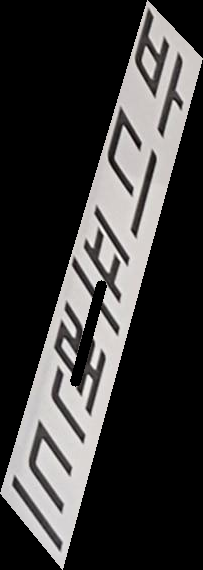

[[1357, 102], [1373, 306], [1493, 308], [1466, 110]]
80.01050419357934 {'text': '의원', 'polygon': [[1357, 102], [1373, 306], [1493, 308], [1466, 110]]}
138 207


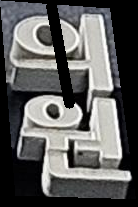

[[1492, 114], [1515, 281], [1568, 281], [1549, 119]]
81.52452056546768 {'text': '진료과목', 'polygon': [[1492, 114], [1515, 281], [1568, 281], [1549, 119]]}
77 168


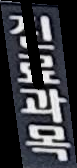

[[107, 32], [171, 45], [114, 435], [23, 415], [85, 72]]
98.25993690297034 {'text': '요가포레스트', 'polygon': [[107, 32], [171, 45], [114, 435], [23, 415], [85, 72]]}
149 404


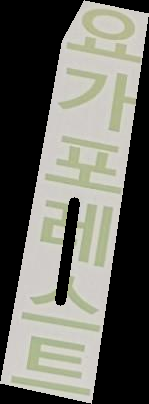

[[85, 134], [58, 190], [188, 608], [305, 584], [159, 125]]
72.05780784467494 {'text': '시원병원', 'polygon': [[85, 134], [58, 190], [188, 608], [305, 584], [159, 125]]}
248 484


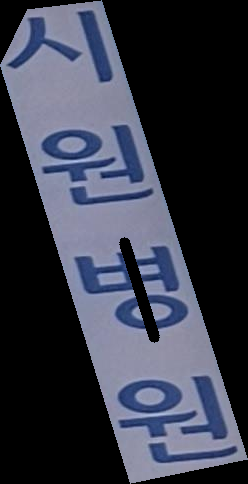

[[82, 60], [61, 79], [159, 388], [217, 378], [115, 71]]
71.72349776692491 {'text': '수현결혼정보', 'polygon': [[82, 60], [61, 79], [159, 388], [217, 378], [115, 71]]}
157 329


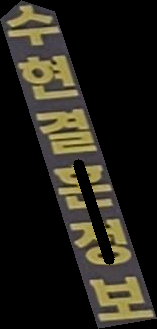

[[254, 254], [301, 254], [301, 311], [254, 311]]
90.0 {'text': '3F', 'polygon': [[254, 254], [301, 254], [301, 311], [254, 311]]}
48 58


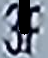

In [49]:
order = [["sangmu_std_MH", "sangmu_str_MH"],
        ["sangmu_std_DI", "sangmu_str_DI"],
        ["sangmu_std_DH", "sangmu_str_DH"]]

order = [["aihub_det", "aihub_rec_3"]]

order = [["sangmu_std_MH", "sangmu_str_MH_v3"],
        ["sangmu_std_DI", "sangmu_str_DI_v2"],
        ["sangmu_std_DH", "sangmu_str_DH_v2"]]


order = [["sangmu_std_MH", "sangmu_str_MH_v3"]]

for _std, _str in order:
    dataset = PPOCR_STD_Dataset_Loader(f"{project.PROJECT_ROOT}/datasets/{_std}", label_file_name="label.txt")
    save_dir = Path(f"{project.PROJECT_ROOT}/datasets/{_str}")
    make_and_save_recognition_dataset(dataset, save_dir, dir_size=1000, label_file_name="label.txt")


In [6]:
dataset
save_dir = Path(f"{project.PROJECT_ROOT}/datasets/aihub_rec_3")
make_and_save_recognition_dataset(dataset, save_dir, dir_size=1000, label_file_name="label.txt")